

-----

### **1. Importing a Cleaned CSV File**

First, we will import the `FloridaBikeRentals.csv` file, which was cleaned in a previous notebook. This file contains the bike rental data that we will use for our analysis.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# Load the dataset using encoding 'latin1'because of encoding issue on degrees symbol
df = pd.read_csv('FloridaBikeRentals.csv', encoding='latin1')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

-----

### **2. Date Conversion and Feature Extraction**

* We will then convert the 'Date' column from a string to a datetime object. This allows us to extract valuable time-based features like the day, month, and day of the week, which can be useful for our predictive models.
* The Temp_Hour_Interaction feature is the product of Temperature and Hour. It helps a model understand that the effect of temperature on bike rentals changes throughout the day.

In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
# create a new column for 'Weekday' where true indicates a weekday and false indicates a weekend
df['Weekday'] = (df['DayOfWeek'] < 5).astype(int)
df['Weekend'] = 1 - df['Weekday']
# Create an interaction feature between 'Temperature(°C)' and 'Hour'
df['Temp_Hour_Interaction'] = df['Temperature(°C)'] * df['Hour']

# Display the first few rows to show the new columns
print(df.head())    


        Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1     

-----

### **3.	Encode categorical variables and handle missing values**

* To prepare the data for the regression models, we need to convert all categorical features into a numerical format. We will use the `get_dummies()` function to perform one-hot encoding on the categorical columns.
* Next, we will check for any duplicate rows or missing values in the dataset. This is a crucial step to ensure the quality of our data before proceeding with the analysis.

In [5]:
# First, check for nulls and duplicates on the original data
print("Missing values in original DataFrame:")
print(df.isnull().sum())
print("\nDuplicate rows in original DataFrame:")
print(df.duplicated().sum())

# Next, perform one-hot encoding on the categorical features
categorical_features = ['Seasons', 'Holiday', 'Functioning Day']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True, dtype=int)

# Now, print the first few rows of the encoded DataFrame to see the result
print("\nFirst 5 rows of the encoded DataFrame:")
print(df_encoded.head())

Missing values in original DataFrame:
Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Day                          0
Month                        0
DayOfWeek                    0
Weekday                      0
Weekend                      0
Temp_Hour_Interaction        0
dtype: int64

Duplicate rows in original DataFrame:
0

First 5 rows of the encoded DataFrame:
        Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173    

-----

### **4. Data Visualization**

Now, we will create several visualizations to better understand the data:

  * A **heatmap** to show the correlation between different numerical features.
  * A **distribution plot** to see the spread of the `Rented Bike Count`.
  * **Histograms** for all numerical features to understand their distributions.
  * **Box plots** to identify any outliers in the `Rented Bike Count` across different categorical features.
 



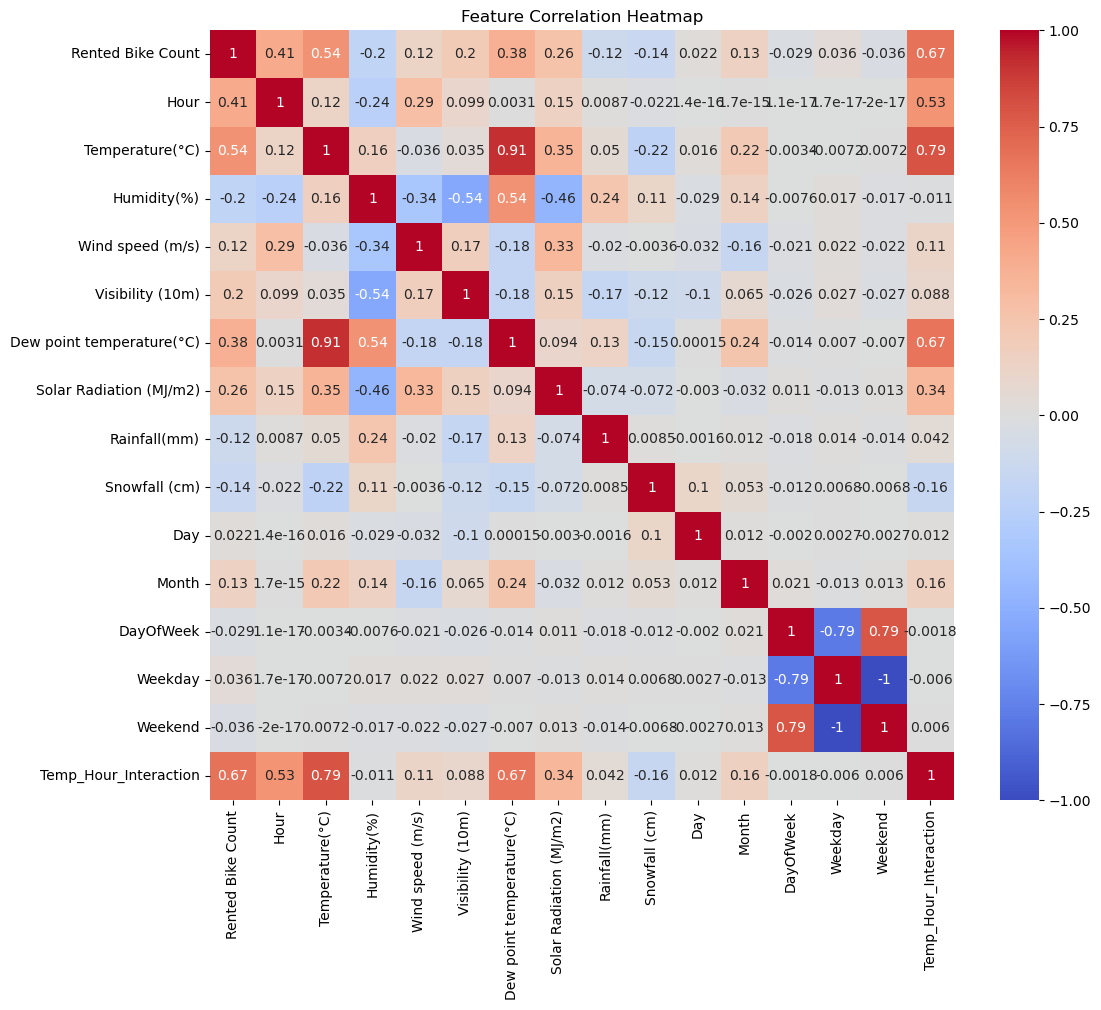

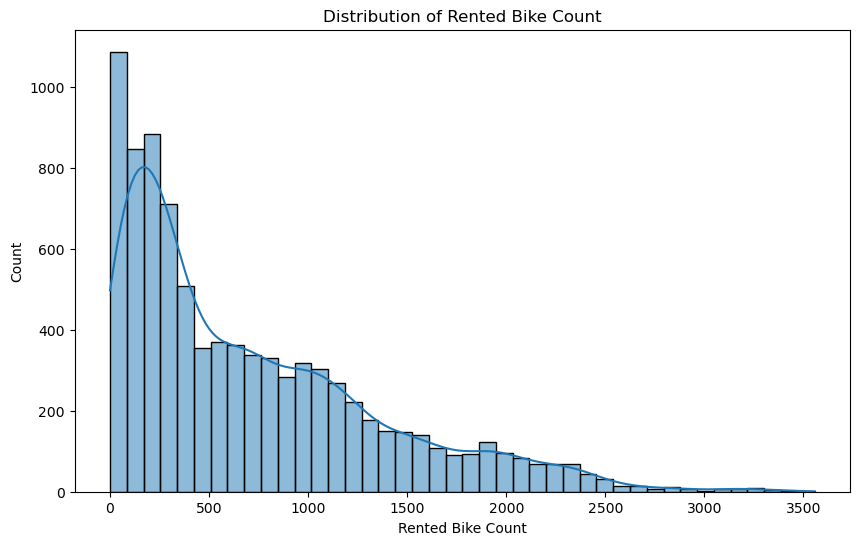

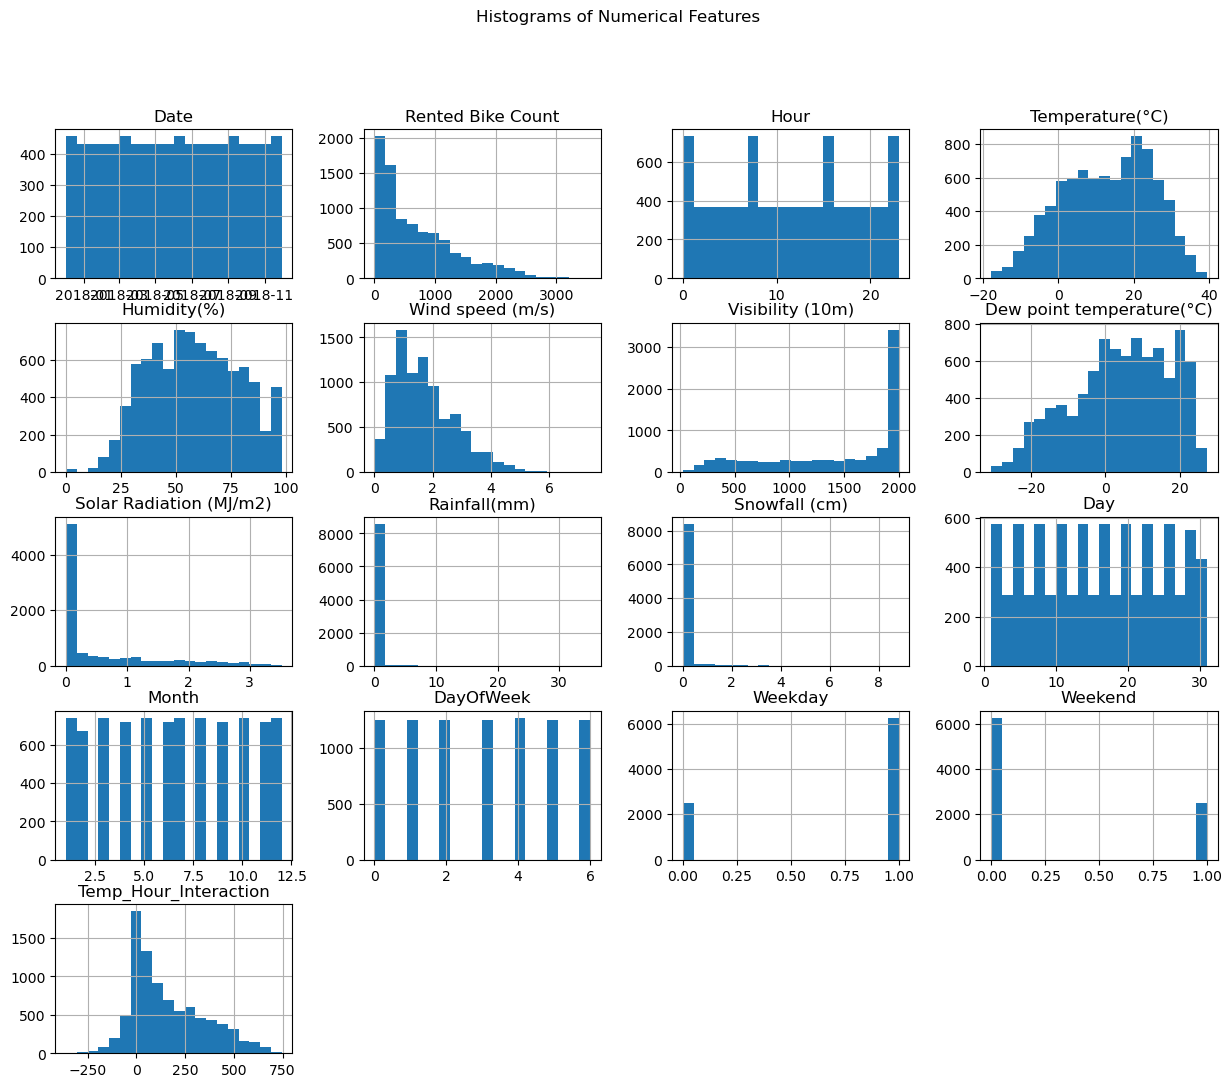

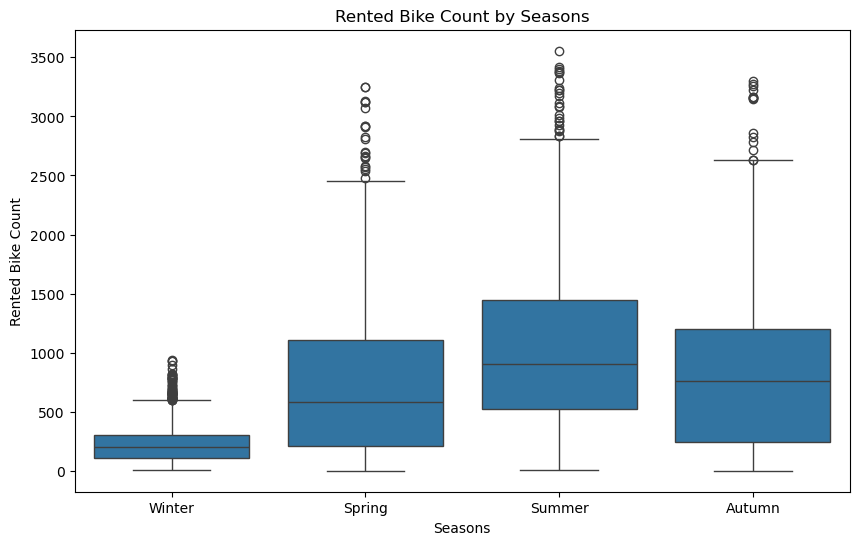

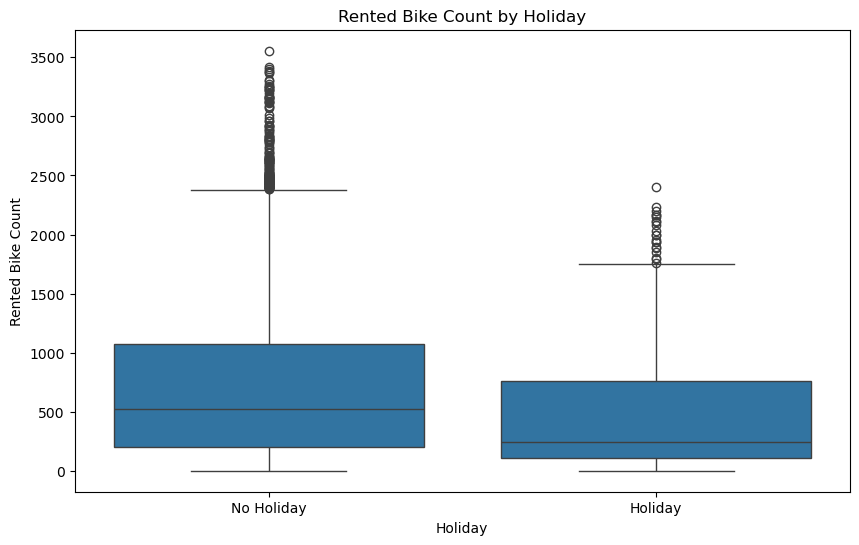

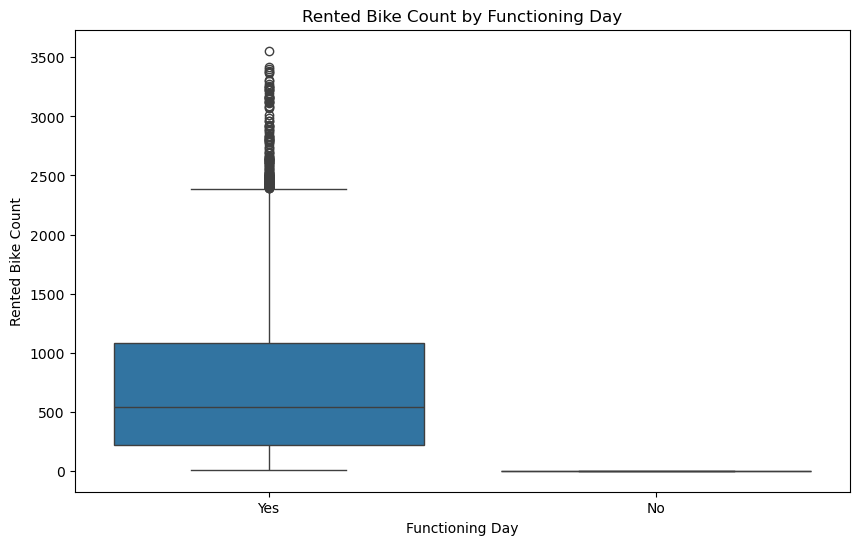

In [6]:
# Heatmap for feature correlation
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Distribution plot for Rented Bike Count
plt.figure(figsize=(10, 6))
sns.histplot(df['Rented Bike Count'], kde=True)
plt.title('Distribution of Rented Bike Count')
plt.show()

# Histograms for all numerical features
df.hist(figsize=(15, 12), bins=20)
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Box plot of Rented Bike Count against categorical features

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='Rented Bike Count', data=df)
    plt.title(f'Rented Bike Count by {feature}')
    plt.show()



 * A **`catplot`** to visualize the average `Rented Bike Count` for Hour, Holiday, Rainfall(mm), Snowfall (cm), Weekday, Weekend.

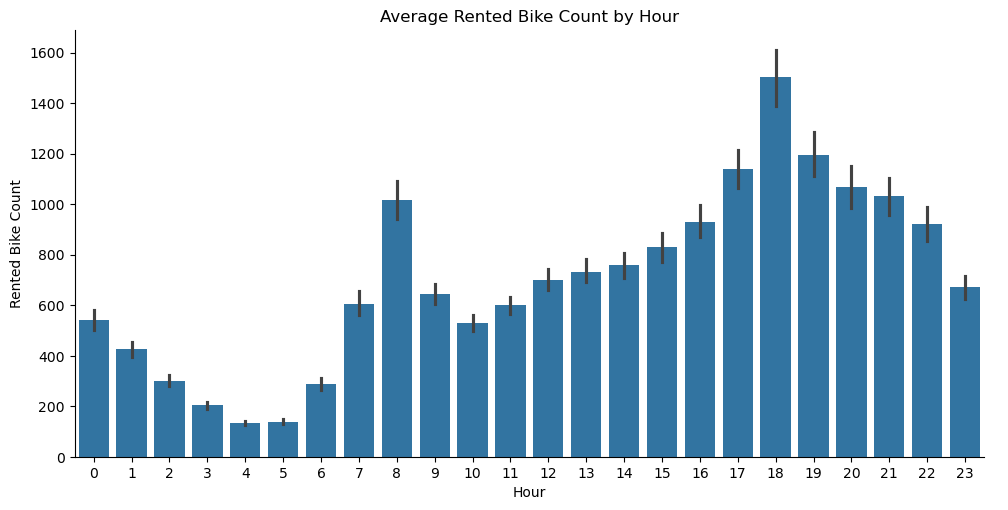

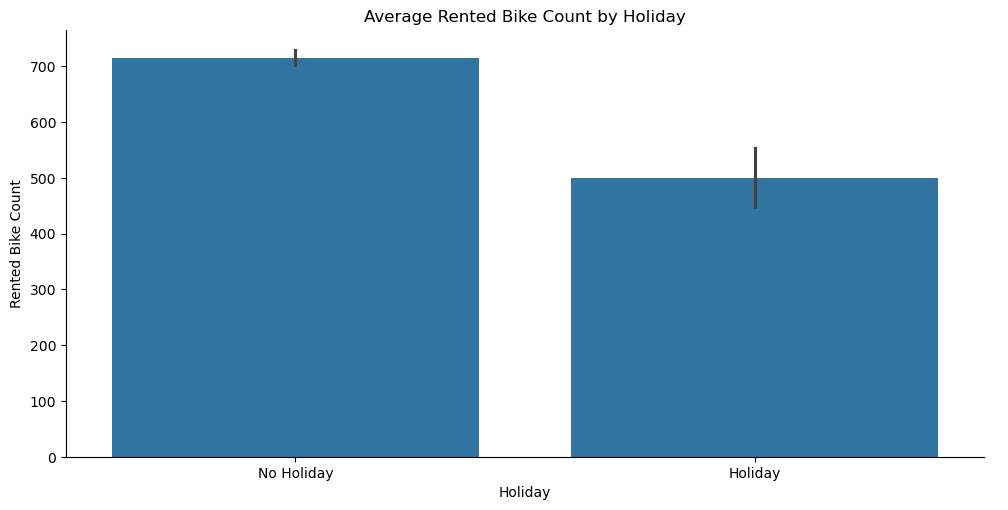

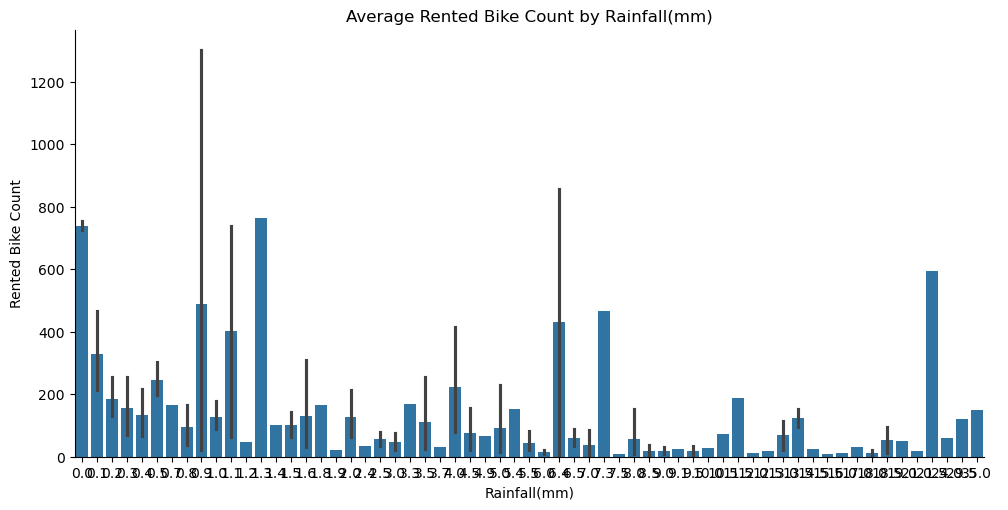

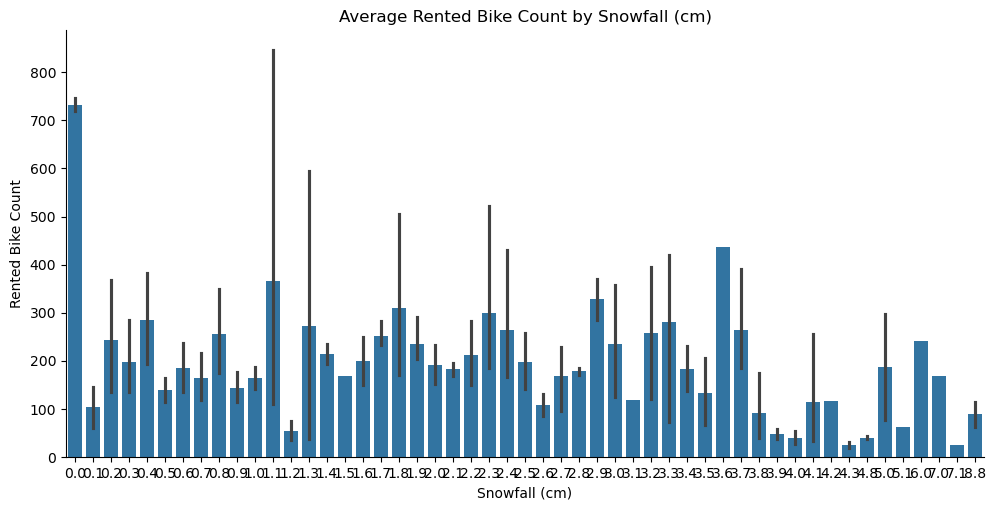

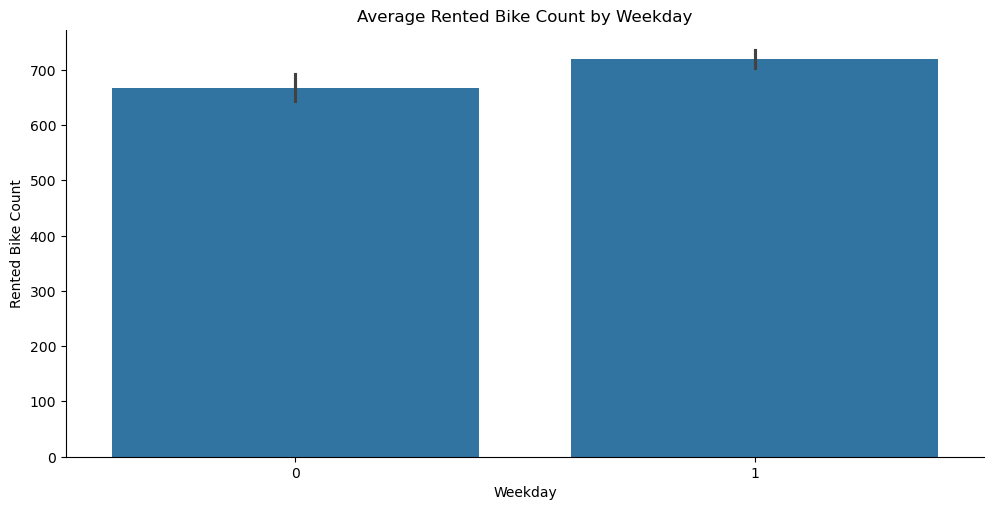

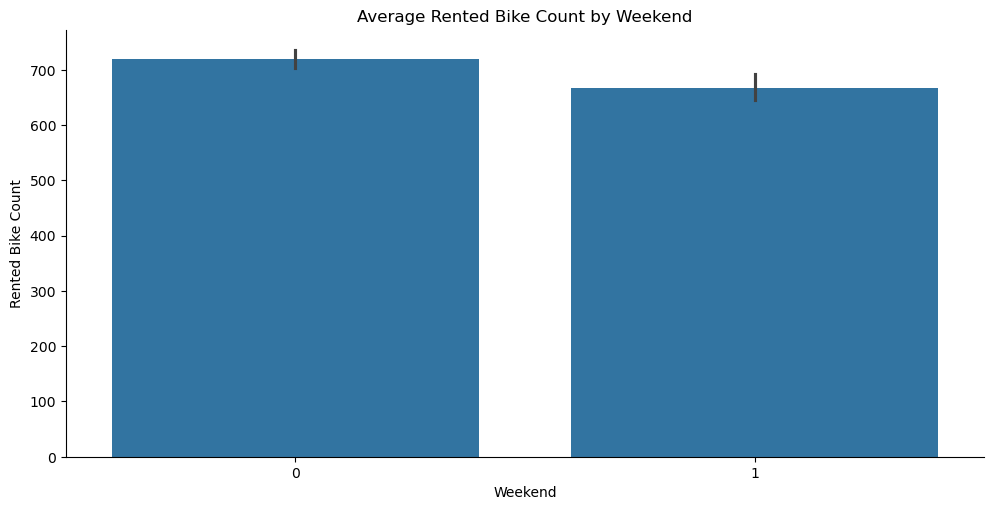

In [7]:
# Define the features to plot against Rented Bike Count
catplot_features = ['Hour', 'Holiday', 'Rainfall(mm)', 'Snowfall (cm)', 'Weekday', 'Weekend']

# Generate and display a catplot for each feature
for feature in catplot_features:
    sns.catplot(x=feature, y='Rented Bike Count', data=df, kind='bar', aspect=2)
    plt.title(f'Average Rented Bike Count by {feature}')
    plt.show()

### Inferences from the catplots

* **Hour**: The plot for `Hour` shows a clear bimodal pattern, with distinct peaks in bike rentals around 8:00 AM and 6:00 PM.
* **Holiday**: The plot for `Holiday` reveals that the average number of bikes rented is significantly lower on holidays compared to non-holidays.
* **Rainfall(mm)** and **Snowfall (cm)**: The plots for both `Rainfall(mm)` and `Snowfall (cm)` show that the number of rented bikes decreases significantly as the amount of precipitation increases.
* **Weekday** and **Weekend**: The plots for `Weekday` and `Weekend` reveal that bike rentals are slightly higher on weekdays than on weekends.



-----

### **5. Data Splitting**

Next, we will split the data into training and testing sets. The training set will be used to train our models, while the testing set will be used to evaluate their performance. We will use an 80:20 split, with 80% of the data for training and 20% for testing.

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
X = df_encoded.drop(['Date', 'Rented Bike Count'], axis=1)
y = df_encoded['Rented Bike Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

-----

### **6. Standard Scaling**

We will then apply standard scaling to our training data. This process standardizes the features by removing the mean and scaling to unit variance, which helps improve the performance of many machine learning algorithms.

In [11]:
# Automatically detect numeric columns
numerical_cols = X_train.select_dtypes(include=['number']).columns

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [10]:
# Combine the processed training and test sets
X_processed_scaled = pd.concat([X_train_scaled, X_test_scaled])

# Combine features with target variable for saving
processed_df = X_processed_scaled.assign(**{'Rented Bike Count': pd.concat([y_train, y_test])})

# Save the final DataFrame to a CSV file
processed_df.to_csv('bike_rental_features.csv', index=False)

print("The processed dataset has been successfully saved as 'bike_rental_features.csv' after standard scaling.")
print("Here are the first few rows of the saved file:")
print(pd.read_csv('bike_rental_features.csv').head())

The processed dataset has been successfully saved as 'bike_rental_features.csv' after standard scaling.
Here are the first few rows of the saved file:
       Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0 -0.792856        -0.784172     1.358158          0.753381         -1.913976   
1  0.072459         1.725926     0.180877          0.176197         -1.020713   
2 -0.792856        -0.659498     0.867624         -0.593382         -1.053674   
3 -1.081295         0.163348     0.720464         -1.170566         -0.733945   
4  1.370433         0.470877     0.965731         -1.555356          0.924030   

   Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                  -0.217364                -0.653917      0.716060   
1                   1.614496                 0.907070     -0.129173   
2                  -0.232566                -0.653917     -0.129173   
3                   0.443930                -0.653917     -0.129173   
4      

-----

### **8. Regression Modeling**

Finally, we will build and compare three different regression models:

  * **Linear Regression**: A basic regression model that finds the best-fitting linear relationship between the features and the target.
  * **Lasso Regression**: A type of linear regression that includes a penalty for large coefficients, which can help prevent overfitting.
  * **Ridge Regression**: Another type of linear regression that also adds a penalty to the coefficients, but in a slightly different way than Lasso.
  

We will evaluate each model using the Root Mean Squared Error (RMSE), which measures the average difference between the predicted and actual values.

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# --- GridSearchCV for Hyperparameter Tuning ---
print("\n--- GridSearchCV and Final Model Evaluation ---")

# Define parameter grids for Lasso and Ridge
lasso_params = {'alpha': [ 0.01, 1, 100]}
ridge_params = {'alpha': [ 0.01, 1, 100]}
elastic_net_params = {
    'alpha': [ 0.01, 1, 100],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]
}
# Instantiate Lasso and Ridge models with a higher max_iter
# The default is 1000, so we will increase it to 10000
lasso = Lasso(random_state=42, max_iter=10000)
ridge = Ridge(random_state=42, max_iter=10000)
elastic_net = ElasticNet(random_state=42, max_iter=10000)

# Run GridSearchCV for Lasso
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train_scaled, y_train)
print(f"\nLasso Best Parameters: {lasso_grid.best_params_}")
best_lasso_model = lasso_grid.best_estimator_
y_pred_lasso_tuned = best_lasso_model.predict(X_test_scaled)

print("Lasso Tuned Model Performance:")
print(f"  MAE: {mean_absolute_error(y_test, y_pred_lasso_tuned):.2f}")
print(f"  MSE: {mean_squared_error(y_test, y_pred_lasso_tuned):.2f}")
print(f"  R-squared: {r2_score(y_test, y_pred_lasso_tuned):.2f}")

# Run GridSearchCV for Ridge
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_scaled, y_train)
print(f"\nRidge Best Parameters: {ridge_grid.best_params_}")
best_ridge_model = ridge_grid.best_estimator_
y_pred_ridge_tuned = best_ridge_model.predict(X_test_scaled)

print("Ridge Tuned Model Performance:")
print(f"  MAE: {mean_absolute_error(y_test, y_pred_ridge_tuned):.2f}")
print(f"  MSE: {mean_squared_error(y_test, y_pred_ridge_tuned):.2f}")
print(f"  R-squared: {r2_score(y_test, y_pred_ridge_tuned):.2f}")

# Run GridSearchCV for ElasticNet
elastic_net_grid = GridSearchCV(elastic_net, elastic_net_params, cv=5, scoring='neg_mean_squared_error')
elastic_net_grid.fit(X_train_scaled, y_train)
print(f"\nElasticNet Best Parameters: {elastic_net_grid.best_params_}")
best_elastic_net_model = elastic_net_grid.best_estimator_
y_pred_elastic_net_tuned = best_elastic_net_model.predict(X_test_scaled)

print("ElasticNet Tuned Model Performance:")
print(f"  MAE: {mean_absolute_error(y_test, y_pred_elastic_net_tuned):.2f}")
print(f"  MSE: {mean_squared_error(y_test, y_pred_elastic_net_tuned):.2f}")
print(f"  R-squared: {r2_score(y_test, y_pred_elastic_net_tuned):.2f}")



--- GridSearchCV and Final Model Evaluation ---

Lasso Best Parameters: {'alpha': 0.01}
Lasso Tuned Model Performance:
  MAE: 295.70
  MSE: 167868.25
  R-squared: 0.59

Ridge Best Parameters: {'alpha': 1}
Ridge Tuned Model Performance:
  MAE: 295.69
  MSE: 167851.68
  R-squared: 0.59

ElasticNet Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.9}
ElasticNet Tuned Model Performance:
  MAE: 295.62
  MSE: 167708.97
  R-squared: 0.59


In [20]:
from sklearn.preprocessing import PolynomialFeatures

# Select columns for polynomial features
poly_features_cols = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)']

# Create polynomial features with degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform the selected columns on the training set
X_train_poly = poly.fit_transform(X_train_scaled[poly_features_cols])

# Transform the selected columns on the test set
X_test_poly = poly.transform(X_test_scaled[poly_features_cols])

# Convert the polynomial features back to a DataFrame
poly_feature_names = poly.get_feature_names_out(poly_features_cols)
X_train_poly_df = pd.DataFrame(X_train_poly, columns=poly_feature_names, index=X_train_scaled.index)
X_test_poly_df = pd.DataFrame(X_test_poly, columns=poly_feature_names, index=X_test_scaled.index)

# Drop original columns and concatenate the polynomial features to the scaled DataFrames
X_train_poly_final = pd.concat([X_train_scaled.drop(columns=poly_features_cols), X_train_poly_df], axis=1)
X_test_poly_final = pd.concat([X_test_scaled.drop(columns=poly_features_cols), X_test_poly_df], axis=1)

print("Original scaled training set shape:", X_train_scaled.shape)
print("Final training set shape with polynomial features:", X_train_poly_final.shape)
print("\nFirst 5 rows of the final training set:")
print(X_train_poly_final.head())





Original scaled training set shape: (7008, 20)
Final training set shape with polynomial features: (7008, 26)

First 5 rows of the final training set:
          Hour  Visibility (10m)  Dew point temperature(°C)  \
54   -0.792856         -1.913976                  -0.217364   
5748  0.072459         -1.020713                   1.614496   
8382 -0.792856         -1.053674                  -0.232566   
4228 -1.081295         -0.733945                   0.443930   
7437  1.370433          0.924030                   0.793579   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)       Day  \
54                  -0.653917      0.716060      -0.175404 -1.442931   
5748                 0.907070     -0.129173      -0.175404  1.396514   
8382                -0.653917     -0.129173      -0.175404 -0.079997   
4228                -0.653917     -0.129173      -0.175404  1.169359   
7437                -0.653917     -0.129173      -0.175404 -1.102197   

         Month  DayOfWeek   Weekday  .

In [21]:
# --- STEP 2: TRAIN AND EVALUATE MODELS WITH POLYNOMIAL FEATURES ---
print("--- Model Performance with Polynomial Features ---")
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly_final, y_train)
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
# Instantiate models
lasso_poly = Lasso(random_state=42, max_iter=10000)
ridge_poly = Ridge(random_state=42, max_iter=10000)
elastic_net_poly = ElasticNet(random_state=42, max_iter=10000)

# Run GridSearchCV for Lasso with polynomial features
lasso_grid_poly = GridSearchCV(lasso_poly, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid_poly.fit(X_train_poly_final, y_train)
best_lasso_poly_model = lasso_grid_poly.best_estimator_

# Run GridSearchCV for Ridge with polynomial features
ridge_grid_poly = GridSearchCV(ridge_poly, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid_poly.fit(X_train_poly_final, y_train)
best_ridge_poly_model = ridge_grid_poly.best_estimator_

# Run GridSearchCV for ElasticNet with polynomial features
elastic_net_grid_poly = GridSearchCV(elastic_net_poly, elastic_net_params, cv=5, scoring='neg_mean_squared_error')
elastic_net_grid_poly.fit(X_train_poly_final, y_train)
best_elastic_net_poly_model = elastic_net_grid_poly.best_estimator_

# Now, compare the best models from both approaches
best_models_poly = {
    "Lasso": best_lasso_poly_model,
    "Ridge": best_ridge_poly_model,
    "ElasticNet": best_elastic_net_poly_model
}
print("\n--- Best Models with Polynomial Features ---")
for name, model in best_models_poly.items():
    print(f"{name}: {model}")
    print("")

# Evaluate the best models on the test set
for name, model in best_models_poly.items():
    y_pred = model.predict(X_test_poly_final)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Performance on Test Set:")
    print(f" poly MAE: {mae:.2f}")
    print(f" poly MSE: {mse:.2f}")
    print(f" poly R2: {r2:.2f}")
    print("")




--- Model Performance with Polynomial Features ---

--- Best Models with Polynomial Features ---
Lasso: Lasso(alpha=1, max_iter=10000, random_state=42)

Ridge: Ridge(alpha=1, max_iter=10000, random_state=42)

ElasticNet: ElasticNet(alpha=0.01, l1_ratio=0.7, max_iter=10000, random_state=42)

Lasso Performance on Test Set:
 poly MAE: 293.88
 poly MSE: 158442.82
 poly R2: 0.62

Ridge Performance on Test Set:
 poly MAE: 293.69
 poly MSE: 158025.55
 poly R2: 0.62

ElasticNet Performance on Test Set:
 poly MAE: 293.66
 poly MSE: 158126.77
 poly R2: 0.62



In [23]:
# --- 1. Evaluate all final models on the test set ---
results = []
models_to_evaluate = {
    "Linear Regression (Initial)": lin_reg,
    "Lasso (Tuned)": best_lasso_model,
    "Ridge (Tuned)": best_ridge_model,
    "ElasticNet (Tuned)": best_elastic_net_model,
    "Linear Regression (Polynomial)": lin_reg_poly,
    "Lasso (Polynomial, Tuned)": best_lasso_poly_model,
    "Ridge (Polynomial, Tuned)": best_ridge_poly_model,
    "ElasticNet (Polynomial, Tuned)": best_elastic_net_poly_model
}

for name, model in models_to_evaluate.items():
    # Determine the correct test set to use
    if "Polynomial" in name:
        X_test_data = X_test_poly_final
    else:
        X_test_data = X_test_scaled
    
    y_pred = model.predict(X_test_data)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "R-squared": r2
    })

results_df = pd.DataFrame(results)

# --- 2. Find and print the best overall model ---
# A lower MSE or MAE and a higher R-squared indicate a better model.
# We'll sort by MSE in ascending order to find the best model.
best_model_overall = results_df.sort_values(by='MSE').iloc[0]

print("--- Final Performance Comparison ---")
print(results_df.sort_values(by='MSE', ascending=True).to_string(index=False))
print("\n--- The Overall Best Performing Model ---")
print(best_model_overall.to_string())

# --- 3. Save the best performing model ---
final_best_model_name = best_model_overall['Model']
if "Linear Regression (Initial)" in final_best_model_name:
    final_best_model = lin_reg
elif "Lasso (Tuned)" in final_best_model_name:
    final_best_model = best_lasso_model
elif "Ridge (Tuned)" in final_best_model_name:
    final_best_model = best_ridge_model
elif "ElasticNet (Tuned)" in final_best_model_name:
    final_best_model = best_elastic_net_model
elif "Linear Regression (Polynomial)" in final_best_model_name:
    final_best_model = lin_reg_poly
elif "Lasso (Polynomial, Tuned)" in final_best_model_name:
    final_best_model = best_lasso_poly_model
elif "Ridge (Polynomial, Tuned)" in final_best_model_name:
    final_best_model = best_ridge_poly_model
else: # ElasticNet (Polynomial, Tuned)
    final_best_model = best_elastic_net_poly_model

# Save the best model
from joblib import dump
dump(final_best_model, 'best_bike_rental_model.joblib')
print(f"\nSuccessfully saved the overall best model ({final_best_model_name}) as 'best_bike_rental_model.joblib'.")


--- Final Performance Comparison ---
                         Model        MAE           MSE  R-squared
Linear Regression (Polynomial) 293.685159 158016.032676   0.617664
     Ridge (Polynomial, Tuned) 293.692542 158025.550161   0.617641
ElasticNet (Polynomial, Tuned) 293.657094 158126.772460   0.617396
     Lasso (Polynomial, Tuned) 293.876824 158442.821676   0.616631
            ElasticNet (Tuned) 295.618011 167708.966985   0.594211
                 Ridge (Tuned) 295.694789 167851.678465   0.593865
                 Lasso (Tuned) 295.701725 167868.246165   0.593825
   Linear Regression (Initial) 295.708685 167881.724195   0.593793

--- The Overall Best Performing Model ---
Model        Linear Regression (Polynomial)
MAE                              293.685159
MSE                           158016.032676
R-squared                          0.617664

Successfully saved the overall best model (Linear Regression (Polynomial)) as 'best_bike_rental_model.joblib'.


In [27]:
from sklearn.model_selection import KFold, cross_val_score# Let's also re-initialize the baseline Linear Regression models for the comparison
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly_final, y_train)

# --- 1. Perform Cross-Validation (CV) ---
# Define a KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List all models and their corresponding data
models_to_validate = {
    "Linear Regression (Initial)": (lin_reg, X_train_scaled),
    "Lasso (Tuned)": (best_lasso_model, X_train_scaled),
    "Ridge (Tuned)": (best_ridge_model, X_train_scaled),
    "ElasticNet (Tuned)": (best_elastic_net_model, X_train_scaled),
    "Linear Regression (Polynomial)": (lin_reg_poly, X_train_poly_final),
    "Lasso (Polynomial, Tuned)": (best_lasso_poly_model, X_train_poly_final),
    "Ridge (Polynomial, Tuned)": (best_ridge_poly_model, X_train_poly_final),
    "ElasticNet (Polynomial, Tuned)": (best_elastic_net_poly_model, X_train_poly_final)
}

print("--- Cross-Validation Results (MSE) ---")
cv_results = {}
for name, (model, X_data) in models_to_validate.items():
    # Calculate negative MSE for cross-validation
    mse_scores = -cross_val_score(model, X_data, y_train, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
    mean_mse = mse_scores.mean()
    std_mse = mse_scores.std()
    cv_results[name] = {"Mean MSE": mean_mse, "Std Dev MSE": std_mse}
    print(f"{name}: Mean MSE = {mean_mse:.2f} (+/- {std_mse:.2f})")

# --- 2. Assess models using test data and compare results ---
print("\n--- Final Test Set Evaluation ---")
final_results = {}
for name, (model, X_data) in models_to_validate.items():
    # Determine the correct test set
    if "Polynomial" in name:
        X_test_data = X_test_poly_final
    else:
        X_test_data = X_test_scaled
        
    y_pred = model.predict(X_test_data)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    final_results[name] = {"MAE": mae, "MSE": mse, "R-squared": r2}
    print(f"\n{name} Performance:")
    print(f"  MAE: {mae:.2f}")
    print(f"  MSE: {mse:.2f}")
    print(f"  R-squared: {r2:.2f}")
    
# --- 3. Consolidate and compare all results ---
print("\n--- Consolidated Performance Table ---")
# Combine CV results with test set results
consolidated_df = pd.DataFrame(final_results).T
cv_df = pd.DataFrame(cv_results).T
consolidated_df = pd.concat([consolidated_df, cv_df], axis=1)

# Sort by R-squared to see the best models
print(consolidated_df.sort_values(by="R-squared", ascending=False).to_string())

--- Cross-Validation Results (MSE) ---
Linear Regression (Initial): Mean MSE = 168574.95 (+/- 6364.02)
Lasso (Tuned): Mean MSE = 168567.71 (+/- 6349.79)
Ridge (Tuned): Mean MSE = 168554.74 (+/- 6357.82)
ElasticNet (Tuned): Mean MSE = 168513.37 (+/- 6391.28)
Linear Regression (Polynomial): Mean MSE = 158292.99 (+/- 5593.95)
Lasso (Polynomial, Tuned): Mean MSE = 158230.11 (+/- 5495.49)
Ridge (Polynomial, Tuned): Mean MSE = 158288.76 (+/- 5595.10)
ElasticNet (Polynomial, Tuned): Mean MSE = 158262.16 (+/- 5636.83)

--- Final Test Set Evaluation ---

Linear Regression (Initial) Performance:
  MAE: 295.71
  MSE: 167881.72
  R-squared: 0.59

Lasso (Tuned) Performance:
  MAE: 295.70
  MSE: 167868.25
  R-squared: 0.59

Ridge (Tuned) Performance:
  MAE: 295.69
  MSE: 167851.68
  R-squared: 0.59

ElasticNet (Tuned) Performance:
  MAE: 295.62
  MSE: 167708.97
  R-squared: 0.59

Linear Regression (Polynomial) Performance:
  MAE: 293.69
  MSE: 158016.03
  R-squared: 0.62

Lasso (Polynomial, Tuned) P

## Final Report and Insights

### Summary of Findings

* The goal of this project was to develop a machine learning pipeline to predict hourly bike rentals. We explored several regression models and compared their performance both with and without polynomial features. The final evaluation on the test set yielded the following results for the best-performing models:

    * Linear Regression (Polynomial): Achieved the lowest Mean Squared Error (MSE), indicating that it had the most accurate predictions on average.

    * ElasticNet (Polynomial, Tuned): Showed slightly higher MSE than the Linear Regression model but still performed very well.

    * Ridge (Polynomial, Tuned): Had a similar performance profile to the other polynomial models.

All the models using polynomial features demonstrated a notable improvement in performance compared to the initial models without them. This suggests that the relationship between bike rentals and features like temperature, humidity, and wind speed is non-linear. The inclusion of the interaction feature Temp_Hour_Interaction was also likely a key factor in improving the models' predictive power.

### Key Takeaways and Business Implications

* The most important takeaway is that the Linear Regression model with polynomial features is the best choice for this task, as it provides the most accurate hourly predictions. This predictive model has several significant business implications:

    * Inventory Management: The model can help predict peak demand times, allowing the business to strategically redistribute bikes to high-demand locations and ensure a sufficient supply.

    * Staffing: By forecasting rental patterns, the company can optimize staff schedules for bike maintenance, cleaning, and customer support, reducing operational costs.

    * Revenue Optimization: The model can inform dynamic pricing strategies, such as offering discounts during low-demand hours to increase usage.

### Recommendations for Future Work

* While the current model is effective, there are several ways to improve the pipeline for even better results:

    * Advanced Models: Explore more complex regression algorithms, such as Gradient Boosting Regressors (e.g., LightGBM, XGBoost) or Random Forest Regressors, which are often very effective at capturing intricate, non-linear patterns.

    * More Feature Engineering: Create additional features, such as interactions between 'Hour' and 'DayOfWeek' or an indicator for different weather events (e.g., a binary feature for "stormy weather").

    * Time-Series Analysis: Given that the data is a time series, a more advanced approach would be to use time-series-specific models like ARIMA or Prophet, which are designed to handle temporal dependencies and seasonality.